In [25]:
import pandas as pd
import numpy as np

In [26]:
features = pd.concat([pd.read_csv('final_data/bcbframe.csv',sep=';',index_col='Date'),
                      pd.read_csv('final_data/yfframe.csv',sep=';',index_col='Date'),
                      pd.read_csv('final_data/ipeaframe.csv',sep=';',index_col='DATE')],axis=1)

In [27]:
target = pd.read_csv('data/target.csv',sep=';',index_col='DATE')

In [28]:
#defasando variavel mais 3 periodos  para previsão com 3 meses de antecedencia
features = features.shift(3).dropna()

In [29]:
target = target[np.isin(target.index,features.index)]

<AxesSubplot:xlabel='DATE'>

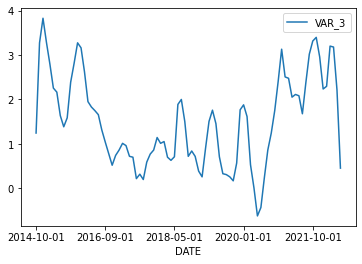

In [30]:
target.plot()

In [31]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 2015-02-01 to 2020-01-01
Columns: 25606 entries, 188 to CNI12_ICEIGER12_e2_sma3_sma6_sma12_o1
dtypes: float64(25606)
memory usage: 17.4+ MB


In [32]:
features.isnull().sum().sum()

0

In [33]:
features.isna().sum().sort_values()

188                                      0
4473_sma3_sma12_o1                       0
4472_sma3_sma12_o1                       0
4471_sma3_sma12_o1                       0
4469_sma3_sma12_o1                       0
                                        ..
29027_e2_o1                              0
29026_e2_o1                              0
29025_e2_o1                              0
272_sma3_o1                              0
CNI12_ICEIGER12_e2_sma3_sma6_sma12_o1    0
Length: 25606, dtype: int64

In [34]:
features = features.fillna(features.median())

In [35]:
features = features[(features.isna().sum(axis=0)<4).replace({False:np.NaN}).dropna().index]

In [36]:
print(f"Features\n--------\nLinhas: " + 
      str(len(features)) + "\nColunas: " + 
      str(len(features.columns)) + 
      "\nRegistros: " + 
      str(len(features)*len(features.columns)))

Features
--------
Linhas: 89
Colunas: 25606
Registros: 2278934


In [37]:
corframe = pd.concat([target,features],axis=1).corr()

In [38]:
ycor = corframe.iloc[1:,0:1]

In [39]:
ycor.abs().sort_values('VAR_3',ascending=False)

,VAR_3
5002_e2_sma6_sma12,0.747942
256_sma3_sma12,0.738623
256_sma3_sma6_sma12,0.738265
256_e2_sma3_sma6_sma12,0.733589
256_e2_sma3_sma12,0.732845
...,...
1564_sma3_sma6_sma12_o1,0.000009
5737_sma3_sma12,NaN
5737_e2_sma3_sma12,NaN
5460_sma6_sma12,NaN


In [40]:
(ycor.abs().sort_values('VAR_3',ascending=False)>=.4).sum()

VAR_3    883
dtype: int64

In [41]:
final_features = (ycor.abs().sort_values('VAR_3',ascending=False)>=.4).replace({False:np.NaN}).dropna().index #60% 44 mae

In [42]:
print(f"Features\n--------\nLinhas: " + 
      str(len(features[final_features])) + "\nColunas: " + 
      str(len(features[final_features].columns)) + 
      "\nRegistros: " + 
      str(len(features[final_features])*len(features[final_features].columns)))

Features
--------
Linhas: 89
Colunas: 883
Registros: 78587


In [43]:
target.columns = ['target']

In [44]:
features = features[final_features]

In [45]:
target.index.rename(None,inplace=True)

In [46]:
frame = pd.concat([features,target],axis=1)

In [47]:
pd.Series(frame.index).apply(lambda x: x[0:4]).value_counts()

2016    12
2017    12
2018    12
2019    12
2020    12
2015    11
2021    11
2022     6
2014     1
dtype: int64

In [48]:
frame = frame.sort_index()

In [49]:
frame.to_csv('final_data/finalframe.csv',sep=';')